# Cab Price Prediction : uber-lyft-cab-prices

### Import the Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
pathdir = "C:\\Users\\sradhakr\\Desktop\\DataScieneBootCamp\\uber-lyft-cab-prices\\"
pathdir+'cab_rides.csv'
cab_ride = pd.read_csv(pathdir+'cab_rides.csv',encoding ="utf-16",delimiter = '\t')

In [3]:
cab_ride.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [4]:
weather_data = pd.read_csv(pathdir+'weather.csv',encoding ="utf-16",delimiter = '\t')

In [5]:
weather_data.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


### Preprocessing steps

In [6]:
#check the data types
cab_ride.dtypes

distance            float64
cab_type             object
time_stamp          float64
destination          object
source               object
price               float64
surge_multiplier    float64
id                   object
product_id           object
name                 object
dtype: object

In [8]:
cab_ride.isnull().sum() #calculate the number of nan's in the columns (axis = 0 column wise addition)

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [9]:
cab_ride.isnull() #retruns boolean

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [23]:
#drop the rows with nan values. Price is the response variable (lable) we need to drop that. we can't fill that by ourselves.
#when we remove index will be changed
cab_ride_nan = cab_ride[~cab_ride['price'].isnull()].copy()

In [24]:
cab_ride_nan

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
5,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,16.5,1.0,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,lyft_lux,Lux Black
6,1.08,Lyft,1.543280e+12,Northeastern University,Back Bay,10.5,1.0,462816a3-820d-408b-8549-0b39e82f65ac,lyft_plus,Lyft XL
7,1.08,Lyft,1.543280e+12,Northeastern University,Back Bay,16.5,1.0,474d6376-bc59-4ec9-bf57-4e6d6faeb165,lyft_lux,Lux Black
8,1.08,Lyft,1.543280e+12,Northeastern University,Back Bay,3.0,1.0,4f9fee41-fde3-4767-bbf1-a00e108701fb,lyft_line,Shared
9,1.08,Lyft,1.543280e+12,Northeastern University,Back Bay,27.5,1.0,8612d909-98b8-4454-a093-30bd48de0cb3,lyft_luxsuv,Lux Black XL


In [26]:
cab_ride_nan.reset_index(drop = True) #drop = True to remove the previous index as it will form a new column 'index' in the cleaned dataset

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
5,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,16.5,1.0,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,lyft_lux,Lux Black
6,1.08,Lyft,1.543280e+12,Northeastern University,Back Bay,10.5,1.0,462816a3-820d-408b-8549-0b39e82f65ac,lyft_plus,Lyft XL
7,1.08,Lyft,1.543280e+12,Northeastern University,Back Bay,16.5,1.0,474d6376-bc59-4ec9-bf57-4e6d6faeb165,lyft_lux,Lux Black
8,1.08,Lyft,1.543280e+12,Northeastern University,Back Bay,3.0,1.0,4f9fee41-fde3-4767-bbf1-a00e108701fb,lyft_line,Shared
9,1.08,Lyft,1.543280e+12,Northeastern University,Back Bay,27.5,1.0,8612d909-98b8-4454-a093-30bd48de0cb3,lyft_luxsuv,Lux Black XL


In [29]:
cab_ride.shape

(693071, 10)

In [30]:
cab_ride_nan.shape

(637976, 10)

In [32]:
cab_ride.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [33]:
cab_ride_nan.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64

In [36]:
#value counts for product id and name
cab_ride_nan["product_id"].value_counts()

6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_premier                            51235
lyft                                    51235
lyft_plus                               51235
lyft_lux                                51235
lyft_luxsuv                             51235
lyft_line                               51233
Name: product_id, dtype: int64

In [35]:
cab_ride_nan["name"].value_counts()

Black SUV       55096
WAV             55096
UberXL          55096
Black           55095
UberX           55094
UberPool        55091
Lux Black       51235
Lux Black XL    51235
Lyft XL         51235
Lyft            51235
Lux             51235
Shared          51233
Name: name, dtype: int64

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(cab_ride_nan["product_id"],cab_ride_nan["name"])

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0, 55094,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0, 55095,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0, 55096,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0, 55096,     0,
            0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0, 55091,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,

In [61]:
cab_ride_nan[cab_ride_nan["product_id"] == "lyft"]["name"].unique() #for lyft product id the name is unique

array(['Lyft'], dtype=object)

In [48]:
cab_ride_nan["product_id"].unique()

array(['lyft_line', 'lyft_premier', 'lyft', 'lyft_luxsuv', 'lyft_plus',
       'lyft_lux', '6f72dfc5-27f1-42e8-84db-ccc7a75f6969',
       '6c84fd89-3f11-4782-9b50-97c468b19529',
       '55c66225-fbe7-4fd5-9072-eab1ece5e23e',
       '9a0e7b09-b92b-4c41-9779-2ad22b4d779d',
       '6d318bcc-22a3-4af6-bddd-b409bfce1546',
       '997acbb5-e102-41e1-b155-9df7de0a73f2'], dtype=object)

In [63]:
cab_ride_nan[cab_ride_nan["name"] == "Lyft"]["product_id"].unique() # for the Lyft name product_id is unique

array(['lyft'], dtype=object)

In [50]:
cab_ride_nan["name"].unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool'],
      dtype=object)

In [53]:
crosstabv = pd.crosstab(cab_ride_nan["product_id"],cab_ride_nan["name"])

In [54]:
crosstabv #we need to drop product id as product id and name are realted/same

name,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
product_id,,,,,,,,,,,,
55c66225-fbe7-4fd5-9072-eab1ece5e23e,0,0,0,0,0,0,0,0,0,55094,0,0
6c84fd89-3f11-4782-9b50-97c468b19529,55095,0,0,0,0,0,0,0,0,0,0,0
6d318bcc-22a3-4af6-bddd-b409bfce1546,0,55096,0,0,0,0,0,0,0,0,0,0
6f72dfc5-27f1-42e8-84db-ccc7a75f6969,0,0,0,0,0,0,0,0,0,0,55096,0
997acbb5-e102-41e1-b155-9df7de0a73f2,0,0,0,0,0,0,0,0,55091,0,0,0
9a0e7b09-b92b-4c41-9779-2ad22b4d779d,0,0,0,0,0,0,0,0,0,0,0,55096
lyft,0,0,0,0,0,51235,0,0,0,0,0,0
lyft_line,0,0,0,0,0,0,0,51233,0,0,0,0
lyft_lux,0,0,0,51235,0,0,0,0,0,0,0,0


In [64]:
#drop surge_multiplier and product_id
cab_ride_nan.drop(["surge_multiplier","id","product_id"], axis=1 , inplace = True)

In [65]:
cab_ride_nan.tail()

,distance,cab_type,time_stamp,destination,source,price,name
693065,1.0,Uber,1.543710e+12,North End,West End,9.5,WAV
693066,1.0,Uber,1.543710e+12,North End,West End,13.0,UberXL
693067,1.0,Uber,1.543710e+12,North End,West End,9.5,UberX
693069,1.0,Uber,1.543710e+12,North End,West End,27.0,Black SUV
693070,1.0,Uber,1.543710e+12,North End,West End,10.0,UberPool


In [72]:
#convert timestamp to actual date time
cab_ride_nan["time_stamp"] = pd.to_datetime(cab_ride_nan["time_stamp"], unit = 'ms')

In [74]:
cab_ride_nan.head()

,distance,cab_type,time_stamp,destination,source,price,name
0,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,5.0,Shared
1,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,11.0,Lux
2,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,7.0,Lyft
3,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,26.0,Lux Black XL
4,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,9.0,Lyft XL


In [76]:
#feature extraction - find weather its a weekday,week end, which day of the week it is, day, time,month, etc., as the price depends heavily on the time and day of the week
#dt contains all the functions that we can extract from date
cab_ride_nan["month"] = cab_ride_nan["time_stamp"].dt.month
cab_ride_nan.head()

,distance,cab_type,time_stamp,destination,source,price,name,month
0,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,5.0,Shared,12
1,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,11.0,Lux,12
2,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,7.0,Lyft,12
3,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,26.0,Lux Black XL,12
4,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,9.0,Lyft XL,12


In [77]:
cab_ride_nan["day"] = cab_ride_nan["time_stamp"].dt.day
cab_ride_nan.head()

,distance,cab_type,time_stamp,destination,source,price,name,month,day
0,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,5.0,Shared,12,16
1,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,11.0,Lux,12,16
2,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,7.0,Lyft,12,16
3,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,26.0,Lux Black XL,12,16
4,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,9.0,Lyft XL,12,16


In [79]:
cab_ride_nan["weekday"] = cab_ride_nan["time_stamp"].dt.dayofweek
cab_ride_nan["hours"] = cab_ride_nan["time_stamp"].dt.hour

In [81]:
cab_ride_nan.tail()

,distance,cab_type,time_stamp,destination,source,price,name,month,day,weekday,hours
693065,1.0,Uber,2018-12-02 00:20:00,North End,West End,9.5,WAV,12,2,6,0
693066,1.0,Uber,2018-12-02 00:20:00,North End,West End,13.0,UberXL,12,2,6,0
693067,1.0,Uber,2018-12-02 00:20:00,North End,West End,9.5,UberX,12,2,6,0
693069,1.0,Uber,2018-12-02 00:20:00,North End,West End,27.0,Black SUV,12,2,6,0
693070,1.0,Uber,2018-12-02 00:20:00,North End,West End,10.0,UberPool,12,2,6,0


In [82]:
cab_ride_nan["minutes"] = cab_ride_nan["time_stamp"].dt.minute

In [83]:
cab_ride_nan.tail()

,distance,cab_type,time_stamp,destination,source,price,name,month,day,weekday,hours,minutes
693065,1.0,Uber,2018-12-02 00:20:00,North End,West End,9.5,WAV,12,2,6,0,20
693066,1.0,Uber,2018-12-02 00:20:00,North End,West End,13.0,UberXL,12,2,6,0,20
693067,1.0,Uber,2018-12-02 00:20:00,North End,West End,9.5,UberX,12,2,6,0,20
693069,1.0,Uber,2018-12-02 00:20:00,North End,West End,27.0,Black SUV,12,2,6,0,20
693070,1.0,Uber,2018-12-02 00:20:00,North End,West End,10.0,UberPool,12,2,6,0,20


In [84]:
cab_ride_nan["time"] =(60*cab_ride_nan["hours"]+cab_ride_nan["minutes"])

In [85]:
cab_ride_nan

,distance,cab_type,time_stamp,destination,source,price,name,month,day,weekday,hours,minutes,time
0,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,5.0,Shared,12,16,6,8,46,526
1,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,11.0,Lux,12,16,6,8,46,526
2,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,7.0,Lyft,12,16,6,8,46,526
3,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,26.0,Lux Black XL,12,16,6,8,46,526
4,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,9.0,Lyft XL,12,16,6,8,46,526
5,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,16.5,Lux Black,12,16,6,8,46,526
6,1.08,Lyft,2018-11-27 00:53:20,Northeastern University,Back Bay,10.5,Lyft XL,11,27,1,0,53,53
7,1.08,Lyft,2018-11-27 00:53:20,Northeastern University,Back Bay,16.5,Lux Black,11,27,1,0,53,53
8,1.08,Lyft,2018-11-27 00:53:20,Northeastern University,Back Bay,3.0,Shared,11,27,1,0,53,53
9,1.08,Lyft,2018-11-27 00:53:20,Northeastern University,Back Bay,27.5,Lux Black XL,11,27,1,0,53,53


In [86]:
cab_ride_nan["time_stamp"].max()

Timestamp('2018-12-18 19:06:40')

In [87]:
cab_ride_nan["time_stamp"].min()

Timestamp('2018-11-26 02:40:00')

In [88]:
cab_ride_nan["time_stamp"].max() - cab_ride_nan["time_stamp"].min()

Timedelta('22 days 16:26:40')

In [93]:
cab_ride_nan["time_stamp"].dt.date.unique()

array([datetime.date(2018, 12, 16), datetime.date(2018, 11, 27),
       datetime.date(2018, 11, 28), datetime.date(2018, 11, 30),
       datetime.date(2018, 11, 29), datetime.date(2018, 12, 17),
       datetime.date(2018, 11, 26), datetime.date(2018, 12, 2),
       datetime.date(2018, 12, 3), datetime.date(2018, 12, 13),
       datetime.date(2018, 12, 14), datetime.date(2018, 12, 1),
       datetime.date(2018, 12, 18), datetime.date(2018, 12, 15),
       datetime.date(2018, 12, 10), datetime.date(2018, 12, 4)],
      dtype=object)

In [94]:
cab_ride_nan["time_stamp"].dt.date.nunique() #we dont have data for all the dates

16

In [98]:
#before 14th december to train set and from 14 to last test data
baselinedt = pd.to_datetime("14-12-2018")
type(baselinedt)

pandas._libs.tslibs.timestamps.Timestamp

In [143]:
trainingset = cab_ride_nan[cab_ride_nan["time_stamp"] < baselinedt].copy()
trainingset.shape

(438392, 13)

In [144]:
testset = cab_ride_nan[~(cab_ride_nan["time_stamp"] < baselinedt)].copy()
testset.shape

(199584, 13)

In [145]:
cab_ride_nan.shape

(637976, 13)

In [146]:
#seperate the price feature
response = trainingset["price"]
trainingset.drop(["price","time_stamp"],axis = 1, inplace = True)

In [147]:
trainingset.tail()

,distance,cab_type,destination,source,name,month,day,weekday,hours,minutes,time
693065,1.0,Uber,North End,West End,WAV,12,2,6,0,20,20
693066,1.0,Uber,North End,West End,UberXL,12,2,6,0,20,20
693067,1.0,Uber,North End,West End,UberX,12,2,6,0,20,20
693069,1.0,Uber,North End,West End,Black SUV,12,2,6,0,20,20
693070,1.0,Uber,North End,West End,UberPool,12,2,6,0,20,20


In [148]:
#we need to feature scaling as the data like - month, days, weekday, hour,minute,time are of different scales, which will ultimately affect the calculation and the model
#this is the process of standardinzing the variables 
#(x=mu)/sigma 
dt_ = trainingset.dtypes

In [149]:
dt_

distance       float64
cab_type        object
destination     object
source          object
name            object
month            int64
day              int64
weekday          int64
hours            int64
minutes          int64
time             int64
dtype: object

In [150]:
#seperate the categorical data out
cat_var = dt_[dt_=="object"].index

In [151]:
cat_var

Index(['cab_type', 'destination', 'source', 'name'], dtype='object')

In [152]:
#seperate the non-categorical data
num_var = dt_[dt_!="object"].index

In [153]:
num_var

Index(['distance', 'month', 'day', 'weekday', 'hours', 'minutes', 'time'], dtype='object')

In [154]:
trainingset

,distance,cab_type,destination,source,name,month,day,weekday,hours,minutes,time
6,1.08,Lyft,Northeastern University,Back Bay,Lyft XL,11,27,1,0,53,53
7,1.08,Lyft,Northeastern University,Back Bay,Lux Black,11,27,1,0,53,53
8,1.08,Lyft,Northeastern University,Back Bay,Shared,11,27,1,0,53,53
9,1.08,Lyft,Northeastern University,Back Bay,Lux Black XL,11,27,1,0,53,53
10,1.08,Lyft,Northeastern University,Back Bay,Lux,11,27,1,0,53,53
11,1.08,Lyft,Northeastern University,Back Bay,Lyft,11,27,1,0,53,53
12,1.11,Uber,West End,North End,UberXL,11,28,2,1,53,113
13,1.11,Uber,West End,North End,Black,11,28,2,1,53,113
14,1.11,Uber,West End,North End,UberX,11,28,2,1,53,113
15,1.11,Uber,West End,North End,WAV,11,28,2,1,53,113


In [155]:
from sklearn.preprocessing import StandardScaler

In [162]:
scalev = StandardScaler()
num_data = scalev.fit_transform(trainingset[num_var]) #performs scaling
num_data = pd.DataFrame(num_data) #convert to data frame from numpy array
num_data.columns = num_var #assign the columns

c:\users\sradhakr\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\sradhakr\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [175]:
num_data.shape

(438392, 7)

In [160]:
scalev.mean_ #mean

array([  2.18894442,  11.39795662,  18.72226455,   2.55233444,
        11.48401659,  25.73749293, 714.7784882 ])

In [161]:
scalev.scale_ #sd

array([  1.13310597,   0.4894764 ,  11.90074886,   1.8808301 ,
         7.05631226,  17.55408539, 422.20306494])

In [164]:
df = pd.DataFrame({"feat1" : ["a","b","a","b"], "feat2" : ["a","a","a","c"]})

In [165]:
pd.get_dummies(df) #one hot encoding

,feat1_a,feat1_b,feat2_a,feat2_c
0,1,0,1,0
1,0,1,1,0
2,1,0,1,0
3,0,1,0,1


In [166]:
df

,feat1,feat2
0,a,a
1,b,a
2,a,a
3,b,c


In [188]:
#we did scaling on numerical variables, now we have to encode categorical variables so that our model can accept that
cat_data = pd.get_dummies(trainingset[cat_var]).reset_index(drop = True)  #concatenation is done based on the index so its necessary to reset index

In [189]:
cat_data.shape

(438392, 38)

In [204]:
final_train = pd.concat([num_data,cat_data], axis=1)

In [205]:
final_train.shape

(438392, 45)

In [206]:
final_train.head()

,distance,month,day,weekday,hours,minutes,time,cab_type_Lyft,cab_type_Uber,destination_Back Bay,...,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,-0.978677,-0.813025,0.695564,-0.825345,-1.627481,1.553058,-1.567441,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.978677,-0.813025,0.695564,-0.825345,-1.627481,1.553058,-1.567441,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,-0.978677,-0.813025,0.695564,-0.825345,-1.627481,1.553058,-1.567441,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,-0.978677,-0.813025,0.695564,-0.825345,-1.627481,1.553058,-1.567441,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,-0.978677,-0.813025,0.695564,-0.825345,-1.627481,1.553058,-1.567441,1,0,0,...,1,0,0,0,0,0,0,0,0,0


### Train the Model

In [207]:
from sklearn.linear_model import LinearRegression

In [208]:
model = LinearRegression()
model.fit(final_train,response)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Test the model

In [209]:
testset.head()

,distance,cab_type,time_stamp,destination,source,price,name,month,day,weekday,hours,minutes,time
0,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,5.0,Shared,12,16,6,8,46,526
1,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,11.0,Lux,12,16,6,8,46,526
2,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,7.0,Lyft,12,16,6,8,46,526
3,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,26.0,Lux Black XL,12,16,6,8,46,526
4,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,9.0,Lyft XL,12,16,6,8,46,526


In [213]:
#preprocess test data
#scaling
test_num = scalev.transform(testset[num_var]) 
test_num = pd.DataFrame(test_num)
test_num.columns = num_var
#transform will not calculate mean and standard deviation but fit_transform will. we are preserving the mean and standard deaviation of the training data

c:\users\sradhakr\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


In [214]:
#one hot encoding
test_cat = pd.get_dummies(testset[cat_var])
#we may not have same shape a we may not have all the categories as the training set. we need to make the test set consistent with the training set
def add_missing_dummy_columns(test_d,columns):
    missing_cols = set(columns) - set(test_d.columns)
    for c in missing_cols :
        test_d[c] = 0
    return test_d
test_cat = add_missing_dummy_columns(test_cat, cat_data.columns)
test_cat = test_cat.reset_index(drop = True)

In [215]:
final_test = pd.concat([test_num,test_cat],axis = 1)

In [217]:
final_test.shape

(199584, 45)

In [218]:
final_test = final_test[final_train.columns]

### Prediction

In [219]:
predic = model.predict(final_test)

In [220]:
predic

array([ 1.82580566, 13.49707031,  5.35986328, ..., 10.55102539,
       21.36657715,  9.42907715])

In [222]:
np.array(testset["price"])

array([ 5. , 11. ,  7. , ..., 16. , 22. , 15.5])

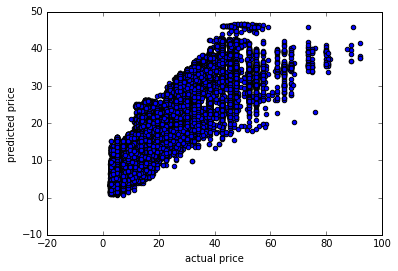

In [227]:
plt.scatter(testset["price"],predic)
plt.xlabel("actual price")
plt.ylabel("predicted price") 
plt.show()

In [228]:
np.corrcoef(testset["price"],predic)

array([[1.        , 0.92864894],
       [0.92864894, 1.        ]])

In [232]:
#evaluation metric
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(testset["price"],predic))

3.572989096815081

### Pickling the model

In [240]:
import pickle
# save the classifier
with open('myfirstmodel.pkl', 'wb') as fid:
    pickle.dump(model, fid) 